# Assignment - 5

You are responsible for making recommendation to the top management about the feasibility of a project and you will use Net Present Value (NPV) approach to do that. Cash flow of the company is calculated by the following formula:

* nYear = 5,# number of years
* costEquipment = 5e6,# 5 million
* n = nYear+1,# add year zero
* price = 28,# price of the product
* units = 100000,# estimate number of units sold
* otherCost = 100000,# other costs
* sellingCost = 1500,# selling and administration cost
* R_D = 200000,# Research and development
* costRawMaterials = 0.3,# percentage cost of raw materials
* R = 0.15# discount rate



Follow these tasks to accomplish the assignment:
* Calculate sales first. (Hint: price * units) (15 pts)
* Subtract costs from sales to calculate cash flow. (15 pts)
* Use discount rate and cash flow to calculate the NPV and make your decision. (70 pts)

In [52]:
# codes here

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [53]:
nYear = 5
costEquipment = 5000000
price = 28
units = 100000 # I assumed this was sales/year
otherCost = 100000 # other costs
sellingCost = 1500 # selling and administration cost
R_D = 200000 # Research and development
costRawMaterials = 0.3 # percentage cost of raw materials
discount_rate = .15
sales = []
cash_flow = []
time_horizon = 5

for i in range(nYear):
    sales.append(price*units)
    
cash_flow.append((costEquipment + R_D) * - 1)    
for i in sales:
    cash_flow.append(costRawMaterials*i - otherCost - sellingCost)

In [54]:
cash_flow

[-5200000, 738500.0, 738500.0, 738500.0, 738500.0, 738500.0]

In [55]:
def NPV(cash_flow, discount_rate, time_horizon):
    cash_gen = []
    for i in range(time_horizon + 1):
        cash_gen.append(cash_flow[i]/(1 + discount_rate) ** i)
    npv = np.sum(cash_gen)
    return npv, cash_gen

In [56]:
npv, cash_gen = NPV(cash_flow, discount_rate, time_horizon)
print("Net present value of the investment:{:.2f}".format(npv))
cash_gen

Net present value of the investment:-2724433.46


[-5200000.0,
 642173.9130434783,
 558412.0982986769,
 485575.7376510233,
 422239.7718704551,
 367165.01901778707]

Text(0, 0.5, 'Cash generated')

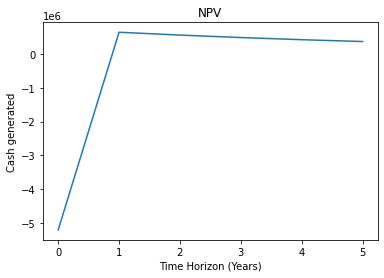

In [57]:
import matplotlib.pyplot as plt
plt.plot(cash_gen)
plt.title('NPV')
plt.xlabel('Time Horizon (Years)')
plt.ylabel('Cash generated')

Given that our initial investment was 5.2 million, the cash generated does not give us enough to equalize the cost - we ended at -2724433.46. As such, the project does not seem feasible in terms of profitability, and I would recommend against it (rather heavily, as a look at nYear/time_horizon = 15 shows the project is still not profitable).